In [1]:
import os

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import sys
import pandas as pd
#import tensorflow
#import keras
import wordcloud
import nltk
import inspect
import re
import unicodedata

#nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import RSLPStemmer #Stemmer for portugese words.

from nltk.probability import FreqDist
from collections import defaultdict
from heapq import nlargest
stop = stopwords.words('portuguese')
stop.append('nao') #Stopword already have "Não", just adding this because it's appear on dataframe

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
#import missingno as msno
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
import sys
import math
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#import folium
#from folium.plugins import Fullscreen
#import geopandas as gpd
import json
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
#os.chdir("/Users/danielacadavid/Documents/Universidad/Maestria/201920/00_Bases/brazilian-ecommerce/")
os.chdir("C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce\\")
os.getcwd()

'C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce'

In [5]:
#customers=pd.read_csv('olist_customers_dataset.csv')
#geolocation=pd.read_csv('olist_geolocation_dataset.csv')
#order_items=pd.read_csv('olist_order_items_dataset.csv')
#order_payments=pd.read_csv('olist_order_payments_dataset.csv')
order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
#orders=pd.read_csv('olist_orders_dataset.csv')
#products=pd.read_csv('olist_products_dataset.csv')
#sellers=pd.read_csv('olist_sellers_dataset.csv')
#product_category_name_trans=pd.read_csv('product_category_name_translation.csv')

In [6]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


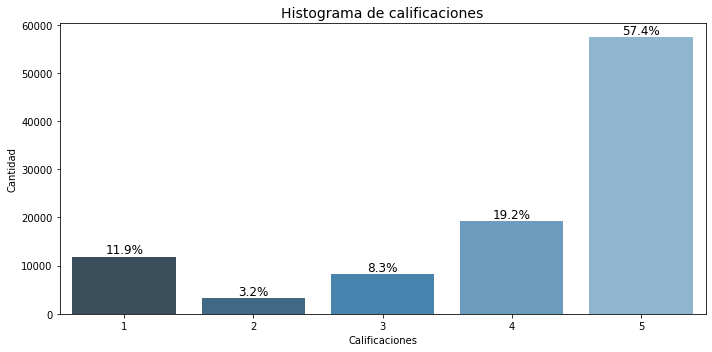

In [8]:
# Preparing the chart
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='review_score', data=order_reviews, palette='Blues_d')
#format_spines(ax, right_border=False)

# Showing frequency
ncount = len(order_reviews)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)

ax.set_title('Histograma de calificaciones', size=14)
ax.set_ylabel('Cantidad')
ax.set_xlabel('Calificaciones')

plt.tight_layout()

plt.show()

In [9]:
order_reviews = order_reviews.dropna(subset=['review_comment_message'])

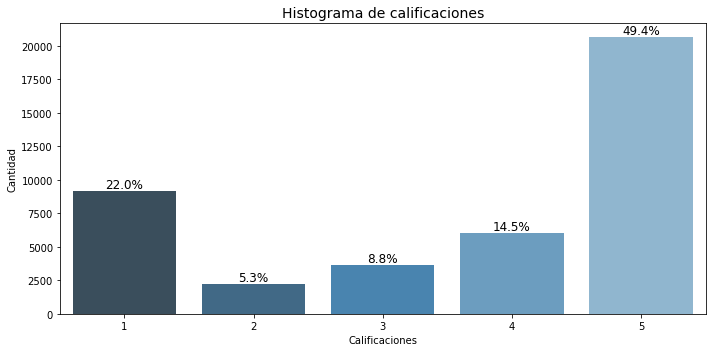

In [10]:
# Preparing the chart
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='review_score', data=order_reviews, palette='Blues_d')
#format_spines(ax, right_border=False)

# Showing frequency
ncount = len(order_reviews)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)

ax.set_title('Histograma de calificaciones', size=14)
ax.set_ylabel('Cantidad')
ax.set_xlabel('Calificaciones')

plt.tight_layout()

plt.show()

In [11]:
order_reviews['word_count'] = order_reviews.review_comment_message.apply(lambda x: len(str(x).split()))

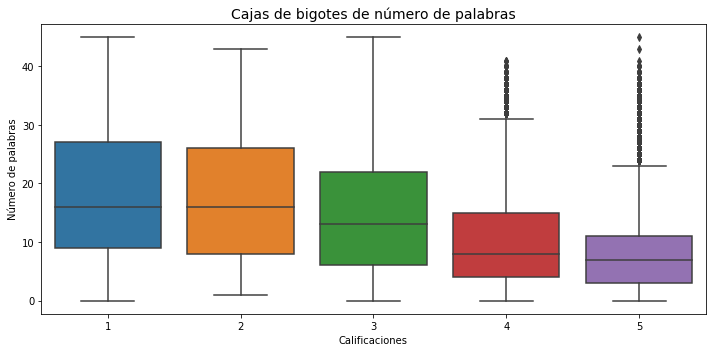

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax=sns.boxplot(x='review_score', y='word_count', data=order_reviews)
ax.set_title('Cajas de bigotes de número de palabras', size=14)
ax.set_ylabel('Número de palabras')
ax.set_xlabel('Calificaciones')

plt.tight_layout()

plt.show()


### ANOVA

In [13]:
import pandas as pd
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

stats.f_oneway(order_reviews['word_count'][order_reviews['review_score'] == 1],
               order_reviews['word_count'][order_reviews['review_score'] == 2],
               order_reviews['word_count'][order_reviews['review_score'] == 3],
               order_reviews['word_count'][order_reviews['review_score'] == 4],
               order_reviews['word_count'][order_reviews['review_score'] == 5]
              )

F_onewayResult(statistic=2151.4656822385787, pvalue=0.0)

In [14]:
results = ols('word_count ~ C(review_score)', data=order_reviews).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             word_count   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2151.
Date:                Thu, 21 May 2020   Prob (F-statistic):               0.00
Time:                        17:07:21   Log-Likelihood:            -1.5022e+05
No. Observations:               41753   AIC:                         3.004e+05
Df Residuals:                   41748   BIC:                         3.005e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               17.8448      0.092    193.475      0.000      17.664      18.026
C(review_score)[T.2]    -0.5069      0.209     -2.430      0.015      -0.916      -0.098
C(review_score)[T.3]    -2.8819      0.173    -16.691      0.000      -3.220      -2.543
C(review_score)[T.4]    -7.1250      0.146    -48.651      0.000      -7.412      -6.838
C(review_score)[T.5]    -9.3464      0.111    -84.312      0.000      -9.564      -9.129
==============================================================================
Omnibus:                     4192.771   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5560.694
Skew:                           0.874   Prob(JB):                         0.00
Kurtosis:                       3.372   Cond. No.                         6.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## TESTE DE TUKEY

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(order_reviews['word_count'], order_reviews['review_score'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.5069 0.1076 -1.0761  0.0623  False
     1      3  -2.8819  0.001 -3.3529 -2.4109   True
     1      4   -7.125  0.001 -7.5245 -6.7255   True
     1      5  -9.3464  0.001 -9.6488 -9.0441   True
     2      3  -2.3749  0.001 -3.0224 -1.7275   True
     2      4  -6.6181  0.001 -7.2155 -6.0206   True
     2      5  -8.8395  0.001 -9.3769 -8.3021   True
     3      4  -4.2431  0.001 -4.7479 -3.7383   True
     3      5  -6.4646  0.001 -6.8967 -6.0325   True
     4      5  -2.2214  0.001 -2.5742 -1.8687   True
----------------------------------------------------


## TESTE SHAPIRO WILK PARA NORMALIDAD

In [16]:
from scipy.stats import shapiro
data=order_reviews['word_count']
# normality test
stat, p = shapiro(data)

In [17]:
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [18]:
p

0.0

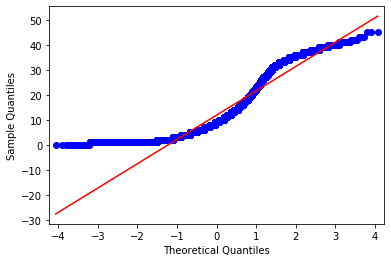

In [19]:
# QQ Plot

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(data, line='s')
pyplot.show()

## Barlett

In [20]:
import scipy.stats as ss

ss.bartlett(order_reviews['word_count'], order_reviews['review_score'])

BartlettResult(statistic=93586.39879799074, pvalue=0.0)

In [21]:
ss.levene(order_reviews['word_count'], order_reviews['review_score'],center = 'median')

LeveneResult(statistic=30798.447709828546, pvalue=0.0)

In [22]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['Um'], d['dois'], d['tres'], d['quat'],d['cinco'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['Um', 'dois', 'tres', 'quat','cinco'])
# replace column names
d_melt.columns = ['index', 'Num_palabras', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(Num_palabras)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

NameError: name 'd' is not defined

In [23]:
order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews = order_reviews.dropna(subset=['review_comment_message'])
lemma_portugues = pd.read_csv('lemmatization_pt.txt',sep="\t", header=None)
lemma_portugues.columns = ["lemma", "palavra"]
lemma_portugues.head()

,lemma,palavra
0,00,iodargírios
1,a,aa
2,aacheniano,aacheniana
3,aacheniano,aachenianas
4,aacheniano,aachenianos


In [24]:
print(f'Hay {order_reviews.shape[0]} observaciones en la base a trabajar\n')

# Examples
for i in range(10):
    print(f'Comentario {i+1}: {np.random.choice(order_reviews["review_comment_message"])}')

Hay 41753 observaciones en la base a trabajar

Comentario 1: Quero saber qual o procedimento pois ainda não recebi o produto. Terei um novo prazo ou o dinheiro de volta?
Comentario 2: Produto de boa qualidade e chegou em perfeito estado .
Comentario 3: O tecido é grosso parece mais organza 1ue cetim....nao gostei o acabamento também é muito ruim.
Comentario 4: Recebi o produto corretamente e antes do prazo estimado.
Comentario 5: Ainda não instalei, vamos ver o acabamento é muito bom!
Comentario 6: Entrega Rápida
Comentario 7: pode comprar
Comentario 8: Tenho acompanhado a evolução da entrega e verifique que o produto se encontra no Rio de Janeiro desde o dia 31/03 e simplesmente não entregam na minha casa.
O status está: Encaminhado para CEE JACARE
Comentario 9: muito bom a entrega foi otima na data certa .
Comentario 10: OTIMO ENTREGOU NO PRAZO PARABENS 


In [25]:
# Example
criticas = list(order_reviews['review_comment_message'].values)
criticas[9]

'A compra foi realizada facilmente.\r\nA entrega foi efetuada muito antes do prazo dado.\r\nO produto já começou a ser usado e até o presente,\r\nsem problemas.'

In [26]:
links = list(order_reviews['review_comment_message'].values)
links[10796]

'comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/'

In [27]:
print(f'Comentario 9:\n')
print(f'{criticas[9]}\n')
print(f'Comentario 234:\n')
print(f'{criticas[234]}\n')
print(f'Comentario 10796: \n')
print(f'{criticas[10796]}\n')

Comentario 9:

A compra foi realizada facilmente.
A entrega foi efetuada muito antes do prazo dado.
O produto já começou a ser usado e até o presente,
sem problemas.

Comentario 234:

Comprei o produto, paguei no boleto e só recebi metade do produto, anunciaram uma coisa é mandaram outra. Muito insatisfeita 😡😡😡

Comentario 10796: 

comprei o produto pela cor ilustrada pelo site da loja americana, no site mostra ser preto http://prntscr.com/jkx7hr quando o produto chegou aqui veio todos com a mesma cor, tabaco http://prntscr.com/



In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\d.cadavid141\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
stemmer = RSLPStemmer()
import re
import unicodedata

def strip_accents(text):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

def remove_urls (text):
    text = re.sub(r"http\S+", "", text)
    return (text)


In [30]:
lemma_portugues.palavra.shape

(850271,)

In [31]:
lp=list(lemma_portugues.palavra)
llem=list(lemma_portugues.lemma)
#llem=dict(lemma_portugues.lemma)
#lemma=dict(lemma_portugues)
#llem

In [32]:
from nltk.tokenize import word_tokenize as word_tokenize

In [33]:
# Applying RegEx for removing urls and sites
order_reviews.review_comment_message = order_reviews.review_comment_message.apply(remove_urls)

#removing numbers
order_reviews.review_comment_message = order_reviews.review_comment_message.str.replace('\d+', ' ')

#lower cases.
order_reviews.review_comment_message = order_reviews.review_comment_message.apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing punctuation
order_reviews.review_comment_message = order_reviews.review_comment_message.str.replace('[^\w\s]',' ')

#Removing stopword
order_reviews.review_comment_message = order_reviews.review_comment_message.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Tokenmize
order_reviews.review_comment_message = order_reviews.apply(lambda row: word_tokenize(row['review_comment_message']), axis=1)


In [34]:
links = list(order_reviews['review_comment_message'].values)
print(f'Comentario 9:\n')
print(f'{links[9]}\n')
print(f'Comentario 234:\n')
print(f'{links[234]}\n')
print(f'Comentario 10796: \n')
print(f'{links[10796]}\n')

Comentario 9:

['compra', 'realizada', 'facilmente', 'entrega', 'efetuada', 'antes', 'prazo', 'dado', 'produto', 'começou', 'ser', 'usado', 'presente', 'problemas']

Comentario 234:

['comprei', 'produto', 'paguei', 'boleto', 'recebi', 'metade', 'produto', 'anunciaram', 'coisa', 'mandaram', 'outra', 'insatisfeita']

Comentario 10796: 

['comprei', 'produto', 'cor', 'ilustrada', 'site', 'loja', 'americana', 'site', 'mostra', 'ser', 'preto', 'produto', 'chegou', 'aqui', 'veio', 'todos', 'mesma', 'cor', 'tabaco']



In [35]:
lt=list(order_reviews.review_comment_message)

In [36]:
from tqdm import tqdm

In [37]:
for myList in tqdm(lt):
    for n, i in enumerate(myList):
        if i in lp:
            pos=lp.index(i)
            item2 = llem[pos]
            myList[n]=item2
        else:
            item2=i
            myList[n]=item2

100%|██████████| 41753/41753 [2:38:03<00:00,  4.40it/s]  


In [38]:
order_reviews.review_comment_message=lt

In [197]:
a=order_reviews

In [198]:
lemma_test = list(a['review_comment_message'].values)
print(f'Comentario 9:\n')
print(f'{lemma_test[9]}\n')
print(f'Comentario 234:\n')
print(f'{lemma_test[234]}\n')
print(f'Comentario 10796: \n')
print(f'{lemma_test[10796]}\n')

Comentario 9:

['comprar', 'realizado', 'fácil', 'entregar', 'efetuada', 'antar', 'prazo', 'dar', 'produto', 'começar', 'ser', 'usar', 'presentar', 'problema']

Comentario 234:

['comprar', 'produto', 'pagar', 'boletar', 'receber', 'dois', 'produto', 'anunciar', 'coisa', 'mandar', 'outro', 'insatisfeito']

Comentario 10796: 

['comprar', 'produto', 'cor', 'ilustrado', 'site', 'loja', 'americano', 'site', 'mostrar', 'ser', 'preto', 'produto', 'chegar', 'aqui', 'vir', 'todo', 'mesmo', 'cor', 'tabaco']



In [199]:
order_reviews.review_comment_message.head()

3               [receber, bem, antar, prazo, estipular]
4     [parabém, loja, lannister, adorar, comprar, in...
9     [aparelhar, eficiente, site, marcar, aparelhar...
12                      [pouco, travar, valor, ta, bom]
15    [vendedor, confiar, produto, ok, entregar, ant...
Name: review_comment_message, dtype: object

In [200]:
def strip_accents(list):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    try:
       # for n, i in enumerate(list):
       #     text = unicode(n, 'utf-8')
       #     text = unicodedata.normalize('NFD', text)
       #     text = text.encode('ascii', 'ignore')
       #     text = text.decode("utf-8")
       #     list[n]=text
        text = ' '.join([str(item) for item in list ])
        text = unicode(text, 'utf-8')
        
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    
    return str(text)

In [201]:
#removing accentuation
order_reviews.review_comment_message = order_reviews.review_comment_message.apply(strip_accents)

#Tokenize again
order_reviews.review_comment_message = order_reviews.apply(lambda row: word_tokenize(row['review_comment_message']), axis=1)


In [202]:
order_reviews.review_comment_message.head()

3               [receber, bem, antar, prazo, estipular]
4     [parabem, loja, lannister, adorar, comprar, in...
9     [aparelhar, eficiente, site, marcar, aparelhar...
12                      [pouco, travar, valor, ta, bom]
15    [vendedor, confiar, produto, ok, entregar, ant...
Name: review_comment_message, dtype: object

In [203]:
sem_ac = list(order_reviews['review_comment_message'].values)
print(f'Comentario 9:\n')
print(f'{sem_ac[9]}\n')
print(f'Comentario 234:\n')
print(f'{sem_ac[234]}\n')
print(f'Comentario 10796: \n')
print(f'{sem_ac[10796]}\n')

Comentario 9:

['comprar', 'realizado', 'facil', 'entregar', 'efetuada', 'antar', 'prazo', 'dar', 'produto', 'comecar', 'ser', 'usar', 'presentar', 'problema']

Comentario 234:

['comprar', 'produto', 'pagar', 'boletar', 'receber', 'dois', 'produto', 'anunciar', 'coisa', 'mandar', 'outro', 'insatisfeito']

Comentario 10796: 

['comprar', 'produto', 'cor', 'ilustrado', 'site', 'loja', 'americano', 'site', 'mostrar', 'ser', 'preto', 'produto', 'chegar', 'aqui', 'vir', 'todo', 'mesmo', 'cor', 'tabaco']



In [204]:
#order_reviews.to_csv("/Users/danielacadavid/Documents/Universidad/Maestria/201920/00_Bases/brazilian-ecommerce/data_tratada.csv")


In [205]:
#order_reviews=pd.read_csv('data_tratada.csv')

In [206]:
test=order_reviews
test.review_comment_message = order_reviews.review_comment_message.apply(strip_accents)


In [207]:
test

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,receber bem antar prazo estipular,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,parabem loja lannister adorar comprar internet...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelhar eficiente site marcar aparelhar impr...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,pouco travar valor ta bom,2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,vendedor confiar produto ok entregar antar prazo,2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,entregar dentro prazo produto chegar condicao ...,2018-02-07 00:00:00,2018-02-19 19:47:23
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,produto enviar nf existir vendar nf certeza fi...,2018-05-19 00:00:00,2018-05-20 21:51:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,excelente mochila entregar super rapido super ...,2018-03-22 00:00:00,2018-03-23 09:10:43
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,solicitar comprar capar retrovisor celta prism...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [208]:
def visualize(label):
    words = ''
    for msg in order_reviews[order_reviews['review_score'] == label]['review_comment_message']:
        msg = msg.lower()
        words += msg + ''
    wordcloud = WordCloud(width=600, height=400,collocations=False).generate(words)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

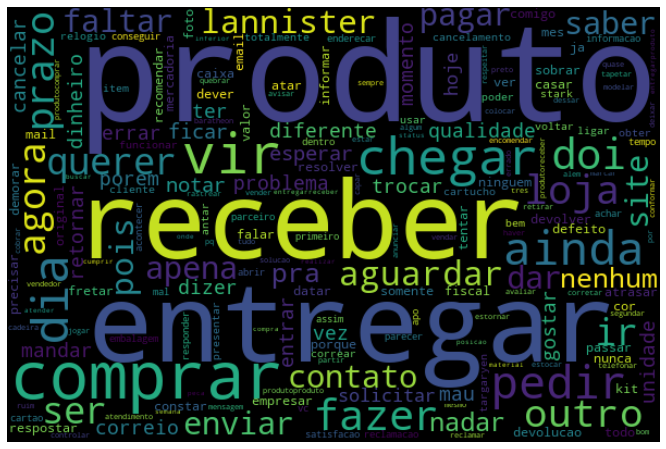

In [209]:
visualize(1)

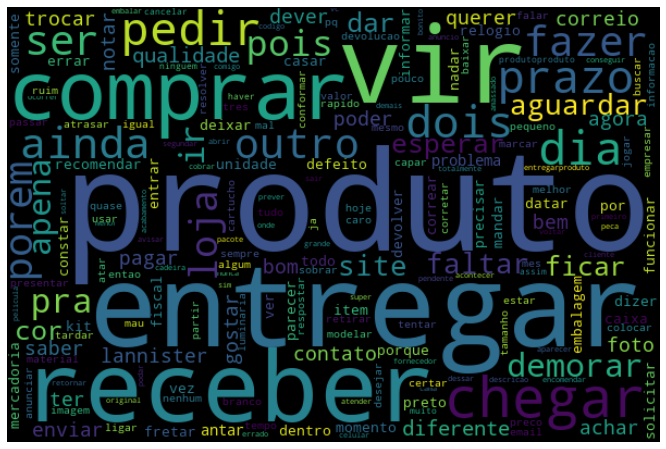

In [210]:
visualize(2)

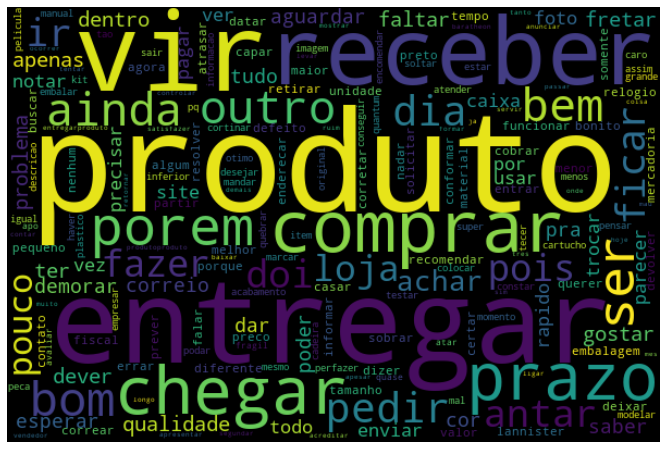

In [211]:
visualize(3)

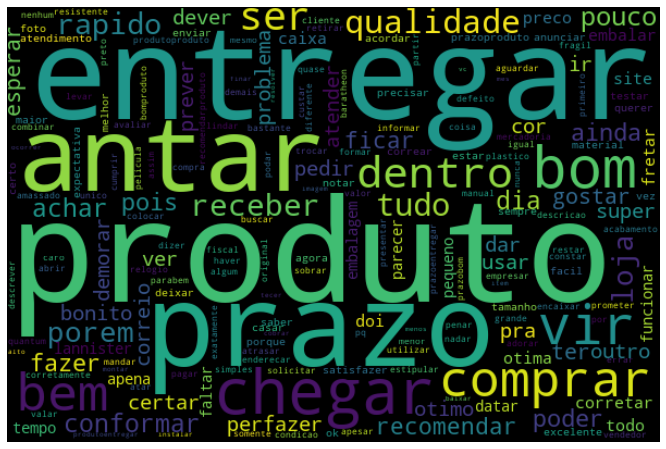

In [212]:
visualize(4)

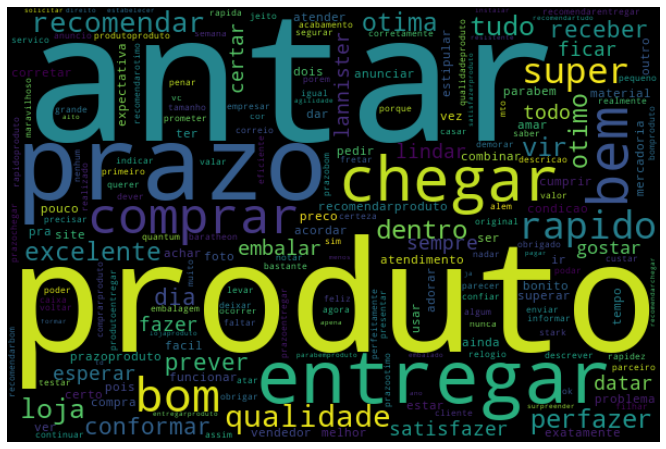

In [213]:
visualize(5)

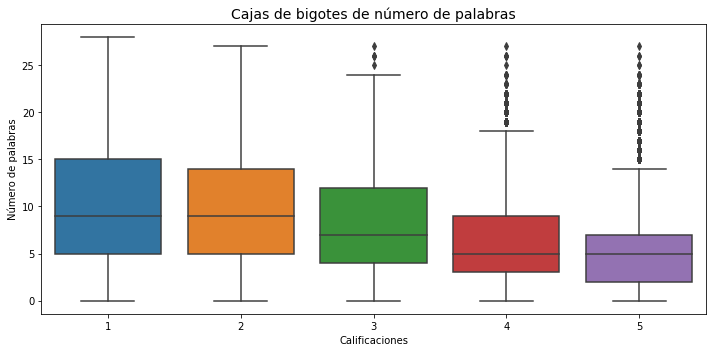

In [214]:
test['word_count'] = test.review_comment_message.apply(lambda x: len(str(x).split()))
fig, ax = plt.subplots(figsize=(10, 5))
ax=sns.boxplot(x='review_score', y='word_count', data=order_reviews)
ax.set_title('Cajas de bigotes de número de palabras', size=14)
ax.set_ylabel('Número de palabras')
ax.set_xlabel('Calificaciones')

plt.tight_layout()

plt.show()


In [215]:
#test_stop=test_stop.remove('não')
#test_stop=test_stop.remove('nao')
#test_stop
stop = stopwords.words('portuguese')
stop.append('nao') #Stopword already have "Não", just adding this because it's appear on dataframe
#stop=stop.remove('não')
#stop=stop.remove('nao')
#stop

In [235]:
test_stop=stop
test_stop.remove('nao')
test_stop.remove('não')

In [236]:
test_stop

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera',
 'esti

In [237]:
order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews = order_reviews.dropna(subset=['review_comment_message'])

In [238]:
# Applying RegEx for removing urls and sites
order_reviews.review_comment_message = order_reviews.review_comment_message.apply(remove_urls)

#removing numbers
order_reviews.review_comment_message = order_reviews.review_comment_message.str.replace('\d+', ' ')

#lower cases.
order_reviews.review_comment_message = order_reviews.review_comment_message.apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing punctuation
order_reviews.review_comment_message = order_reviews.review_comment_message.str.replace('[^\w\s]',' ')

#Removing stopword
order_reviews.review_comment_message = order_reviews.review_comment_message.apply(lambda x: " ".join(x for x in x.split() if x not in test_stop))

#Tokenmize
order_reviews.review_comment_message = order_reviews.apply(lambda row: word_tokenize(row['review_comment_message']), axis=1)


In [239]:
lt=list(order_reviews.review_comment_message)

In [240]:
for myList in lt:
    for n, i in enumerate(myList):
        if i in lp:
            pos=lp.index(i)
            item2 = llem[pos]
            myList[n]=item2
        else:
            item2=i
            myList[n]=item2

In [241]:
order_reviews.review_comment_message=lt

#removing accentuation
order_reviews.review_comment_message = order_reviews.review_comment_message.apply(strip_accents)

#Tokenize again
order_reviews.review_comment_message = order_reviews.apply(lambda row: word_tokenize(row['review_comment_message']), axis=1)


In [242]:
#order_reviews.to_csv("/Users/danielacadavid/Documents/Universidad/Maestria/201920/00_Bases/brazilian-ecommerce/data_tratada_v_nao.csv")


In [243]:
test=order_reviews
test.review_comment_message = order_reviews.review_comment_message.apply(strip_accents)


In [244]:
def visualize(label):
    words = ''
    for msg in test[test['review_score'] == label]['review_comment_message']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400,collocations=False).generate(words)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

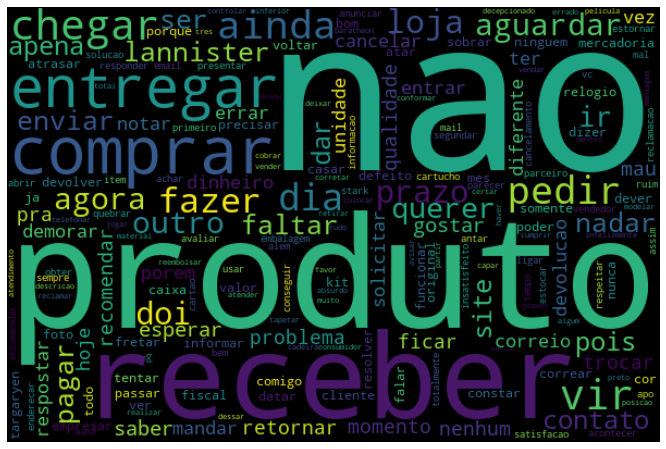

In [245]:
visualize(1)

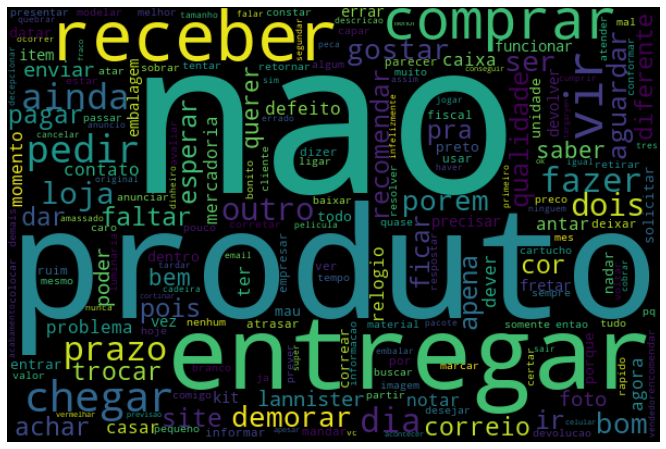

In [246]:
visualize(2)

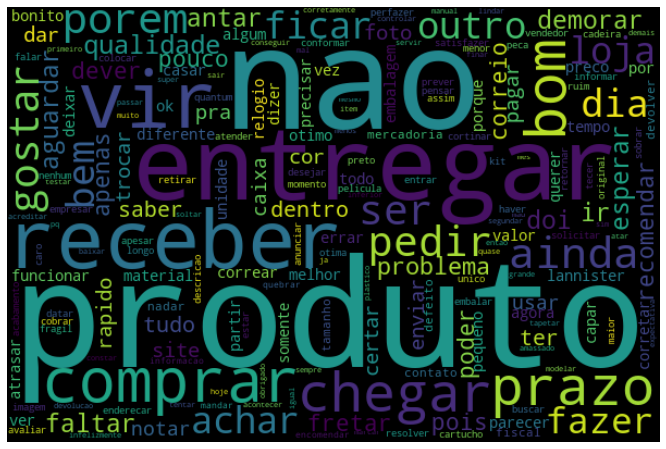

In [247]:
visualize(3)

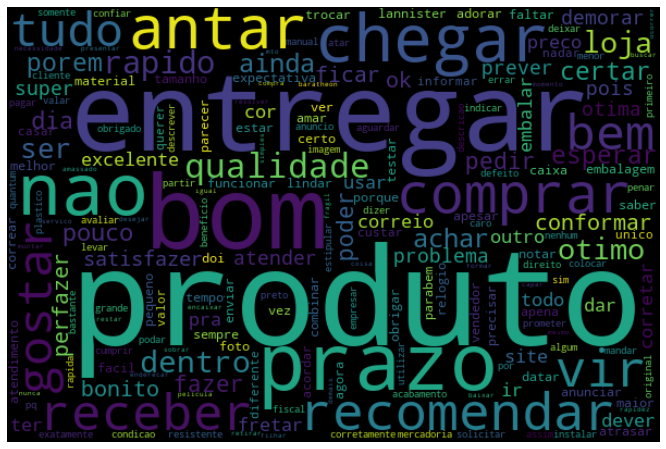

In [248]:
visualize(4)

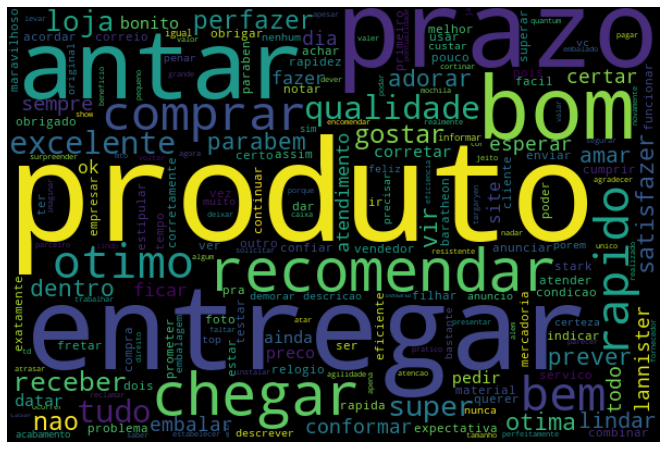

In [249]:
visualize(5)

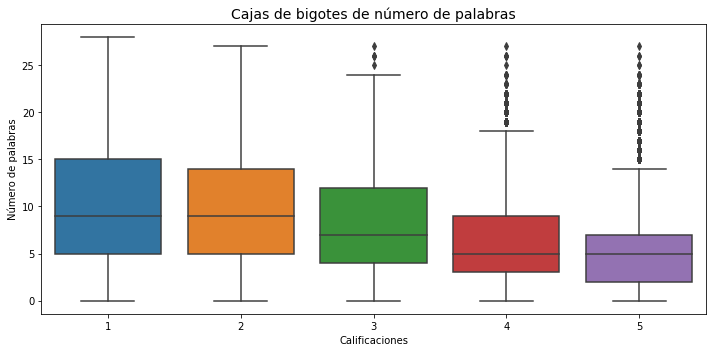

In [234]:
test['word_count'] = test.review_comment_message.apply(lambda x: len(str(x).split()))
fig, ax = plt.subplots(figsize=(10, 5))
ax=sns.boxplot(x='review_score', y='word_count', data=order_reviews)
ax.set_title('Cajas de bigotes de número de palabras', size=14)
ax.set_ylabel('Número de palabras')
ax.set_xlabel('Calificaciones')

plt.tight_layout()

plt.show()
